In [1]:
# Tener dependencias y declarar variables del dataset
import pandas
import matplotlib.pyplot as plt
variable = pandas.read_csv('fortune500.csv', na_values=0)

In [49]:
# Imprimir los primeros registros
variable.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806.0
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [3]:
# Renombrar las columnas a nuestro gusto
variable.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [4]:
# Numero de registros en el dataset
len(variable)

25500

In [5]:
# Reviso los tipos de datos
variable.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [6]:
variable.astype({
    'year': 'int',
    'rank': 'int',
    'company': 'str',
    'revenue': 'float',
    # 'profit': 'float'
    # Profit tiene problemas de datos
}).head()


,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [6]:
errorProfits = variable.profit.str.contains('[^0-9.-]')
rows = variable.loc[errorProfits]
rows.head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [7]:
# Que otros problemas podemos tener?
set(rows.profit)

{'N.A.'}

In [8]:
# Veamos cuantos son en total
len(rows)

369

In [9]:
rows

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.
...,...,...,...,...,...
24242,2003,243,Farmland Industries,7580.2,N.A.
24296,2003,297,Land O'Lakes,5847.0,N.A.
24435,2003,436,Roundy's,3637.9,N.A.
24489,2003,490,Ace Hardware,3029.0,N.A.


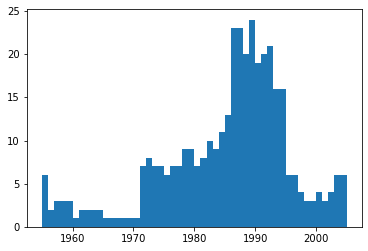

In [10]:
# Veamos la data para ver en donde localizamos los errores
plt.hist(rows.year, bins=rows.year)
plt.show()

In [11]:
# Eliminamos los registros inutiles de nuestro analisis
variable = variable.loc[variable.profit != 'N.A.']
variable.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [23]:
variable.astype({
    'year': 'int',
    'rank': 'int',
    'company': 'str',
    'revenue': 'float',
    'profit': 'float',
})
variable['profit'] = pandas.to_numeric(variable['profit'])
variable.dtypes


year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

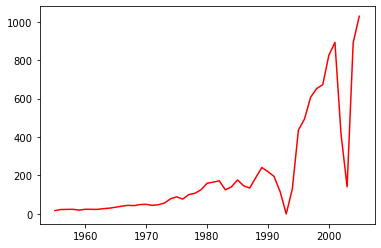

In [97]:
# variable.groupby('year')['revenue'].mean().head()
plt.plot(variable.groupby('year')['profit'].mean(), 'r')
plt.show()

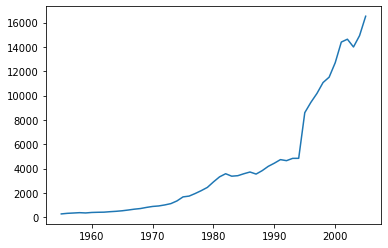

In [161]:
variable.groupby('year')['revenue'].head()
plt.plot(variable.groupby('year')['revenue'].mean())
plt.show()

In [95]:
npArrayRevenue = variable.groupby('year')['year','revenue'].mean().to_numpy()

In [96]:
npArrayRevenueStd = variable.groupby('year')['revenue'].std().to_numpy()

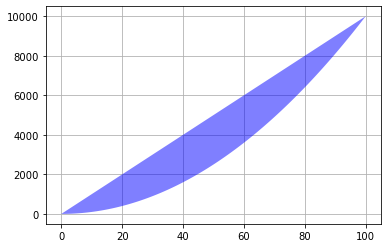

In [94]:
import numpy
fig, ax = plt.subplots()
x = numpy.linspace(1955,2005,51)
x1=numpy.linspace(0,100,500)
y1 = x1 ** 2

ax.fill(x1, y1, 'b', zorder = 10, alpha=0.5)
ax.grid(True, zorder=5)